# **The Problem Description:** 

---



Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. 

More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, secularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. 

In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

## Data Description:

---



The Street View House Numbers (SVHN) Dataset SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images. 

### Link to the dataset: 

https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

# **Steps and tasks**

---



### 1. Load Dataset
### 2. Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
### 3. Data fetching and understand the train/val/test splits. (15 points)

In [4]:
#Mounting the google drive 

from google.colab import drive
drive.mount('/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/


In [2]:
# Loading necessary libraries 
import h5py
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

%tensorflow_version 2.x
import tensorflow as tf
tf.__version__


'2.2.0'

In [3]:
import random as rd
rd.seed(10)

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
filename = "/gdrive/My Drive/AIML/Labs/NNData/SVHN_single_grey1.h5"
h5f = h5py.File(filename, 'r')

In [6]:
# Listing the contents of H5 file
list(h5f)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

Reference: Train Test validate Data

https://www.youtube.com/watch?v=Zi-0rlM4RDs

In [7]:
# Load the training test and validation set

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test  = h5f['X_test'][:]
y_test  = h5f['y_test'][:]

X_val   = h5f['X_val'][:]
y_val   = h5f['y_val'][:]

# Close this file
h5f.close()

In [8]:
#Print the shape of all the datas available.
print ('X_train Shape: ', X_train.shape)
print ('y_train Shape: ', y_train.shape)
print ('X_val Shape: ', X_val.shape)
print ('y_val Shape: ', y_val.shape)
print ('X_test Shape: ', X_test.shape)
print ('y_test Shape: ', y_test.shape)

X_train Shape:  (42000, 32, 32)
y_train Shape:  (42000,)
X_val Shape:  (60000, 32, 32)
y_val Shape:  (60000,)
X_test Shape:  (18000, 32, 32)
y_test Shape:  (18000,)


## Visualizing the dataset


### Training Set

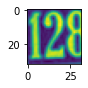

Label for the Image 2


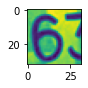

Label for the Image 6


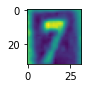

Label for the Image 7


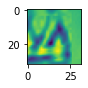

Label for the Image 4


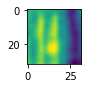

Label for the Image 4


In [9]:
#Print First 5 image from Training Set
for i in range(0,5):
  plt.figure(figsize=(1, 1))
  plt.imshow(X_train[i])
  plt.show(True)
  print("Label for the Image",y_train[i])

### Validation Set

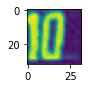

Label for the Image 0


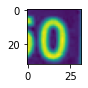

Label for the Image 0


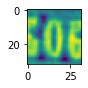

Label for the Image 0


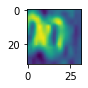

Label for the Image 0


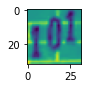

Label for the Image 0


In [10]:
#Print First 5 image from Validation Set
for i in range(0,5):
  plt.figure(figsize=(1, 1))
  plt.imshow(X_val[i])
  plt.show(True)
  print("Label for the Image",y_val[i])

## Observation

---



**Validation Set** images are of same label from 0 to 5, variation is very less, So we need to select the data randomly otherwise it will have data sparseness.

Printing list of 5 random numbers
[37447, 2135, 28107, 31625, 37885]


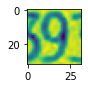

Label for the Image 9


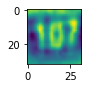

Label for the Image 0


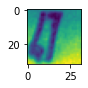

Label for the Image 7


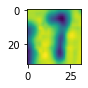

Label for the Image 7


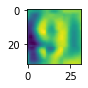

Label for the Image 9


In [11]:
import random

randomList = []
# Set a length of the list to 10
for i in range(0, 5):
    # any random numbers from 0 to 1000
    randomList.append(random.randint(0, 60000))

print("Printing list of 5 random numbers")
print(randomList)

#Print First 5 image from Validation Set
for i in randomList:
  plt.figure(figsize=(1, 1))
  plt.imshow(X_val[i])
  plt.show(True)
  print("Label for the Image",y_val[i])

### Test Set

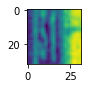

Label for the Image 1


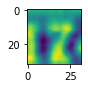

Label for the Image 7


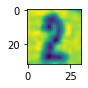

Label for the Image 2


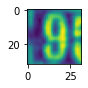

Label for the Image 9


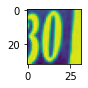

Label for the Image 0


In [12]:
#Print First 5 image from test Set
for i in range(0,5):
  plt.figure(figsize=(1, 1))
  plt.imshow(X_test[i])
  plt.show(True)
  print("Label for the Image",y_test[i])

In [13]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
print(X_test.shape)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1] * X_val.shape[2])
print(X_val.shape)


(42000, 1024)
(18000, 1024)
(60000, 1024)


In [14]:
## normalize inputs from 0-255 to 0-1
#X_train = X_train/255.0
##X_test =X_test /255.0
#X_val =X_val /255.0

## Observation:

---
1. There are 3 Set of Data, Train, Validate and Test Set
2. **Training Set** - 42000 image of 32*32 Pixel are with same no. of Labeld data
3. **Validation Set** - 60000 image of 32*32 Pixel are with same no. of Labeld data
4. **Test Set** - 18000 image of 32*32 Pixel are with same no. of Labeld data
5. **Validation Set** images are in the similar label from 0 to 5, variation is very less, So we need to re-arrange the data otherwise during sample pickup it will have data sparseness.









### For the basic Image Classification pipeline and the data-driven approach (train/predict stages), Let's use k-Nearest Neighbor (kNN) classifier

In [15]:
def getRandList(from_arr, howMany):
  randomList = []
  for i in range(0, int(howMany)):
    randomList.append(random.randint(0, len(from_arr)))
  return randomList;

In [16]:
# Subsample the data for more efficient code execution in this exercise

X_train = X_train[np.array(getRandList(X_train,len(X_train)/50))] #840 Train Data
y_train = y_train[np.array(getRandList(y_train,len(y_train)/50))]

X_test = X_test[np.array(getRandList(X_test,len(X_test)/180))] #100 Test Data
y_test = y_test[np.array(getRandList(y_test,len(y_test)/180))]

X_val = X_val[np.array(getRandList(X_val,len(X_val)/150))] #400 Validation Data
y_val = y_val[np.array(getRandList(y_val,len(y_val)/150))]

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(840, 1024)
(840,)
(400, 1024)
(400,)
(100, 1024)
(100,)


## Observation

---



**Visualizing the Distribution of Training, Validation and Test Set** after the Sub Sample, To Ensure there is no class imballance while secting the Sample Data

Unique Set of Data at Train Set:  [0 1 2 3 4 5 6 7 8 9]


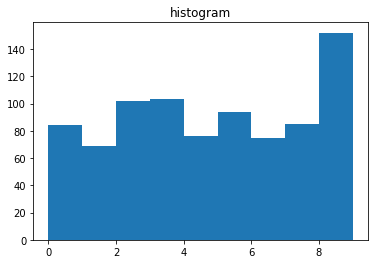

In [17]:
from matplotlib import pyplot as plt 
import numpy as np  

print('Unique Set of Data at Train Set: ',np.unique(y_train))
plt.hist(y_train, bins = [0,1,2,3,4,5,6,7,8,9]) 
plt.title("histogram") 
plt.show()

Unique Set of Data at Test Set:  [0 1 2 3 4 5 6 7 8 9]


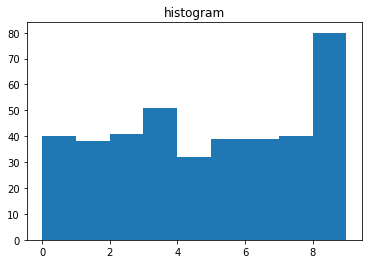

In [18]:
from matplotlib import pyplot as plt 
import numpy as np  
print('Unique Set of Data at Test Set: ',np.unique(y_val))
plt.hist(y_val, bins = [0,1,2,3,4,5,6,7,8,9],) 
plt.title("histogram") 
plt.show()

Unique Set of Data at Test Set:  [0 1 2 3 4 5 6 7 8 9]


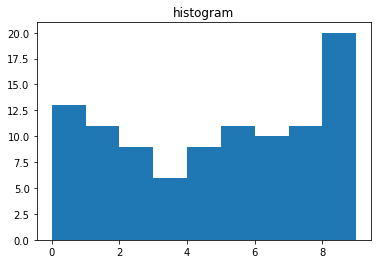

In [19]:
from matplotlib import pyplot as plt 
import numpy as np  
print('Unique Set of Data at Test Set: ',np.unique(y_test))
plt.hist(y_test, bins = [0,1,2,3,4,5,6,7,8,9],) 
plt.title("histogram") 
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3,algorithm='brute')

In [21]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [22]:
# Find the accuracy score for Training data
score = NNH.score(X_train, y_train)
print(score)

0.4083333333333333


In [23]:
# Find the accuracy score for val data
score = NNH.score(X_val, y_val)
print(score)

0.1075


In [24]:
# Predicting only for first 300 data rows to reduce execution time
predicted_KNN = NNH.predict(X_val)

In [25]:
from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc, roc_curve

metrics.accuracy_score(y_val,predicted_KNN)

0.1075

### Print the classification metric report for KNN Model

In [26]:
from sklearn.metrics import classification_report

target_names = ['0', '1', '2','3','4','5','6','7','8','9']

print(classification_report(y_val, predicted_KNN,target_names=target_names))

              precision    recall  f1-score   support

           0       0.11      0.28      0.16        40
           1       0.12      0.21      0.16        38
           2       0.08      0.12      0.10        41
           3       0.10      0.12      0.11        51
           4       0.09      0.09      0.09        32
           5       0.13      0.10      0.11        39
           6       0.18      0.05      0.08        39
           7       0.11      0.05      0.07        40
           8       0.09      0.02      0.04        46
           9       0.11      0.03      0.05        34

    accuracy                           0.11       400
   macro avg       0.11      0.11      0.10       400
weighted avg       0.11      0.11      0.10       400



In [27]:
#Finding the optimal K
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 3-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    scores = cross_val_score(knn, X_val, y_val, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())
    print("for k = ",k,", Accuracy = ",cv_scores[-1])

for k =  1 , Accuracy =  0.09746380877567051
for k =  3 , Accuracy =  0.1124452923353159
for k =  5 , Accuracy =  0.11246399581042156
for k =  7 , Accuracy =  0.10995773014626116
for k =  9 , Accuracy =  0.1149515579994763
for k =  11 , Accuracy =  0.1099390266711555
for k =  13 , Accuracy =  0.11248269928552725
for k =  15 , Accuracy =  0.11994538585269143
for k =  17 , Accuracy =  0.10255115400441402
for k =  19 , Accuracy =  0.10505741966857442
for k =  21 , Accuracy =  0.10255115400441402
for k =  23 , Accuracy =  0.10253245052930833
for k =  25 , Accuracy =  0.09248868439756107
for k =  27 , Accuracy =  0.10251374705420267
for k =  29 , Accuracy =  0.10245763662888564
for k =  31 , Accuracy =  0.08747615306924027
for k =  33 , Accuracy =  0.10002618486514793
for k =  35 , Accuracy =  0.10253245052930833
for k =  37 , Accuracy =  0.10000748139004227
for k =  39 , Accuracy =  0.11504507537500468
for k =  41 , Accuracy =  0.11504507537500468
for k =  43 , Accuracy =  0.09751991920098

The optimal number of neighbors is 15


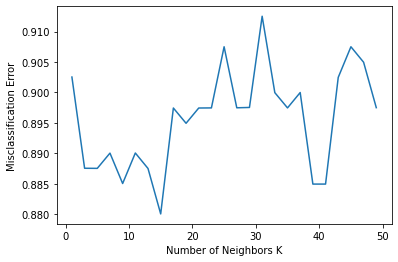

In [28]:
from matplotlib import pyplot as plt
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

lstneighbors = list(filter(lambda x: x % 2 != 0, myList))

# determining best k
optimal_k = lstneighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(lstneighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [29]:
#Lets build the Knn model with optiomal K 

neigh = KNeighborsClassifier(n_neighbors=optimal_k,algorithm='brute')
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [30]:
# Find the accuracy score for Training data
score = NNH.score(X_train, y_train)
print(score)

0.4083333333333333


In [31]:
# Find the accuracy score for val data
score = NNH.score(X_val, y_val)
print(score)

0.1075


In [32]:
#Get the accuracy score for test data
NNH.score(X_test, y_test)

0.17

In [33]:
# Predicting only for first 300 data rows to reduce execution time
predicted_KNN = NNH.predict(X_test)

In [34]:
from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc, roc_curve

metrics.accuracy_score(y_test,predicted_KNN)

0.17

## Test

---

**Let's Verify** few Data for Test on Prediction and Actual Before going for Accuracy Score

In [35]:
#Predicted Data
predicted_KNN[0:10]

array([5, 1, 2, 2, 7, 8, 1, 1, 3, 4], dtype=uint8)

In [36]:
#Actual Data
y_test[0:10]

array([6, 8, 6, 3, 7, 2, 9, 6, 0, 1], dtype=uint8)

In [37]:
from sklearn.metrics import classification_report

target_names = ['0', '1', '2','3','4','5','6','7','8','9']

print(classification_report(y_test, predicted_KNN,target_names=target_names))

              precision    recall  f1-score   support

           0       0.27      0.31      0.29        13
           1       0.00      0.00      0.00        11
           2       0.19      0.44      0.27         9
           3       0.17      0.33      0.22         6
           4       0.25      0.22      0.24         9
           5       0.17      0.18      0.17        11
           6       0.33      0.10      0.15        10
           7       0.14      0.09      0.11        11
           8       0.00      0.00      0.00         5
           9       0.50      0.07      0.12        15

    accuracy                           0.17       100
   macro avg       0.20      0.17      0.16       100
weighted avg       0.23      0.17      0.16       100



## Observation

---

1. Overall **Accuracy is very poor** for KNN even started with **K-fold=3 and Optimal K=15 Hyperparameter** set.

2. The Data Selected for Train, Validate and Test All are **having image Labeled 0-9**.

3. With Hyper Parameterization Accuracy Score improved from 11% to 17% in Test



# 4. Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (25 points)

Reference: https://faroit.com/keras-docs/2.0.6/getting-started/sequential-model-guide/

In [5]:
# Loading necessary libraries 
import h5py
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.2.0'

In [6]:
from keras import applications
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [7]:
filename = "/gdrive/My Drive/AIML/Labs/NNData/SVHN_single_grey1.h5"
h5f = h5py.File(filename, 'r')

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test  = h5f['X_test'][:]
y_test  = h5f['y_test'][:]

X_val   = h5f['X_val'][:]
y_val   = h5f['y_val'][:]

h5f.close();

In [8]:
#Initialize model, reshape
modelNN = tf.keras.models.Sequential()
modelNN.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [9]:
#Add 1st hidden layer
modelNN.add(tf.keras.layers.Dense(200 , activation='relu'))

#Add 2nd hidden layer
modelNN.add(tf.keras.layers.Dense(100 , activation='relu'))

#Add 3rd hidden layer
#modelNN.add(tf.keras.layers.Dense(50 , activation='relu')) #Commented as Loss was comming nan

#Add 4th hidden layer
#modelNN.add(tf.keras.layers.Dense(100 , activation='relu')) #Commented as Loss was comming nan

#Add OUTPUT layer
modelNN.add(tf.keras.layers.Dense(10 , activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

#Compile the model
modelNN.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
modelNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 226,110
Trainable params: 226,110
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Convering to One Hot Vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [12]:
modelNN_output = modelNN.fit(X_train , y_train, batch_size=200, epochs=100, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
210/210 [==============================] - 2s 11ms/step - loss: 520928064.0000 - accuracy: 0.1016 - val_loss: 2.3141 - val_accuracy: 0.1000
Epoch 2/100
210/210 [==============================] - 2s 10ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3141 - val_accuracy: 0.1000
Epoch 3/100
210/210 [==============================] - 2s 10ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3141 - val_accuracy: 0.1000
Epoch 4/100
210/210 [==============================] - 2s 10ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3141 - val_accuracy: 0.1000
Epoch 5/100
210/210 [==============================] - 2s 10ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3141 - val_accuracy: 0.1000
Epoch 6/100
210/210 [==============================] - 2s 10ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3141 - val_accuracy: 0.1000
Epoch 7/100
210/210 [==============================] - 2s 10ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3141 - val_a

In [13]:
score = modelNN.evaluate(X_test,y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

563/563 [==============================] - 1s 2ms/step - loss: 2.3408 - accuracy: 0.0955
Test loss: 2.3408455848693848
Test accuracy: 0.09549999982118607


## Observations:
#### Even with SGD, the accuray of the model is not increased.*** Lets implement bacthnormalization***

# 5. Implement batch normalization for training the neural network(10 points)

In [17]:
#Initialize Sequential model
modelBNN = tf.keras.models.Sequential()

modelBNN.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
modelBNN.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
modelBNN.add(tf.keras.layers.Dense(200, activation='relu'))

#Normalize the data
modelBNN.add(tf.keras.layers.BatchNormalization())
#Dropout layer
modelBNN.add(tf.keras.layers.Dropout(0.5))

#Add 2nd hidden layer
#modelBNN.add(tf.keras.layers.Dense(150, activation='relu')) #Commented as loss was coming nan

#Normalize the data
#modelBNN.add(tf.keras.layers.BatchNormalization())
#Dropout layer
#modelBNN.add(tf.keras.layers.Dropout(0.4))

#Add 3rd hidden layer
modelBNN.add(tf.keras.layers.Dense(100, activation='relu'))

#Normalize the data
modelBNN.add(tf.keras.layers.BatchNormalization())
#Dropout layer
modelBNN.add(tf.keras.layers.Dropout(0.5))


#Add 4th hidden layer
modelBNN.add(tf.keras.layers.Dense(50, activation='relu'))

#Normalize the data
modelBNN.add(tf.keras.layers.BatchNormalization())
#Dropout layer
modelBNN.add(tf.keras.layers.Dropout(0.2))


#Add OUTPUT layer
modelBNN.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
modelBNN.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
modelBNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_7 (Dense)              (None, 200)               205000    
_________________________________________________________________
batch_normalization_5 (Batch (None, 200)               800       
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_6 (Batch (None, 100)              

In [19]:
modelBNN_output = modelBNN.fit(X_train , y_train, batch_size=200, epochs=200, validation_data=(X_val, y_val), verbose=1)

Epoch 1/200
210/210 [==============================] - 3s 17ms/step - loss: 2.5679 - accuracy: 0.1331 - val_loss: 2.0634 - val_accuracy: 0.3011
Epoch 2/200
210/210 [==============================] - 3s 16ms/step - loss: 2.1693 - accuracy: 0.2128 - val_loss: 1.8166 - val_accuracy: 0.4351
Epoch 3/200
210/210 [==============================] - 3s 16ms/step - loss: 1.9658 - accuracy: 0.2926 - val_loss: 1.6357 - val_accuracy: 0.5098
Epoch 4/200
210/210 [==============================] - 3s 16ms/step - loss: 1.8296 - accuracy: 0.3461 - val_loss: 1.4981 - val_accuracy: 0.5647
Epoch 5/200
210/210 [==============================] - 3s 16ms/step - loss: 1.7284 - accuracy: 0.3899 - val_loss: 1.3893 - val_accuracy: 0.5975
Epoch 6/200
210/210 [==============================] - 3s 16ms/step - loss: 1.6412 - accuracy: 0.4256 - val_loss: 1.2905 - val_accuracy: 0.6366
Epoch 7/200
210/210 [==============================] - 3s 17ms/step - loss: 1.5727 - accuracy: 0.4570 - val_loss: 1.2067 - val_accuracy:

## Observation

After 200 of iteration of the NN Model with batch of 200, We got 
Training loss: 0.6639
Training accuracy: 0.7945 
val loss: 0.3929 
val_accuracy: 0.8845

***Verify the Test Data Loss and Accuracy:***

In [20]:
score = modelBNN.evaluate(X_test,y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

563/563 [==============================] - 1s 2ms/step - loss: 0.4747 - accuracy: 0.8564
Test loss: 0.47471967339515686
Test accuracy: 0.8563888669013977


## Observation

After 200 of iteration of the NN Model with batch of 200, We got 
**Test Data loss**: 0.4747
**Test Data accuracy**: 0.8564 

Which is in between Traing Loss/Accouracy and Validation Loss/Accuracy

In [21]:
predictionsBNN = modelBNN.predict(X_test)

In [22]:
#Predicted Data
predictionsBNN[0:10].argmax(axis=1)

array([1, 7, 2, 9, 0, 9, 1, 8, 1, 4])

Printing list of 10 random numbers
[5882, 9426, 3496, 15976, 8124, 4038, 15110, 3358, 10341, 5337]


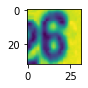

Label for the Image 6


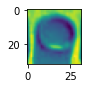

Label for the Image 0


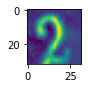

Label for the Image 2


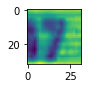

Label for the Image 7


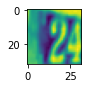

Label for the Image 2


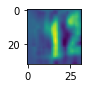

Label for the Image 1


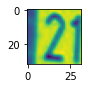

Label for the Image 2


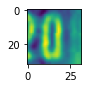

Label for the Image 0


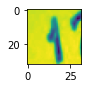

Label for the Image 1


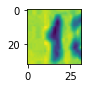

Label for the Image 1


In [24]:
import random

randomList = []
# Set a length of the list to 10
for i in range(0, 10):
    # any random numbers from 0 to 18000(Max of test Data)
    randomList.append(random.randint(0, 18000))

print("Printing list of 10 random numbers")
print(randomList)

count=0
for i in randomList:
  plt.figure(figsize=(1, 1))
  plt.imshow(X_test[i])
  plt.show(True)
  print("Label for the Image",y_test[randomList].argmax(axis=1)[count])
  count=count +1

**Data Validated**, No Mismatch for the random 10 images taken from Entire Test Data.

## 6. Print the classification accuracy metrics (10 points)

In [25]:
from sklearn.metrics import classification_report

target_names = ['0', '1', '2','3','4','5','6','7','8','9']

ClassificationReportBNN = classification_report(y_test.argmax(axis=1), predictionsBNN.argmax(axis=1) ,target_names=target_names)
print(ClassificationReportBNN)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1814
           1       0.83      0.87      0.85      1828
           2       0.89      0.86      0.87      1803
           3       0.83      0.81      0.82      1719
           4       0.86      0.88      0.87      1812
           5       0.82      0.86      0.84      1768
           6       0.88      0.84      0.86      1832
           7       0.89      0.88      0.89      1808
           8       0.84      0.82      0.83      1812
           9       0.85      0.84      0.85      1804

    accuracy                           0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000



## Overall Observations & Report:

### KNN 

*   KNN is having very poor accuracy than the Neural Network
*   K-NN accuracy improved from 11% to 17% with hyperparameter tuning and optimal K value of 15.

### Deep Neural Network.

*   Deep Neural Network yields better results and predict very well, just check the sample output. 

*   Classification report shows Almost 86% Accuracy with equal Precission and Recall Value.
